<a href="https://colab.research.google.com/github/sjin0911/25Miniproject1-Ensemble/blob/main/Ensemble_result/Ensemble_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
REPO_URL="https://github.com/sjin0911/25Miniproject1-Ensemble"
WORKDIR="/content/25Miniproject1-Ensemble/"
!rm -rf "$WORKDIR"
!git clone --depth 1 "$REPO_URL" "$WORKDIR"
%cd "$WORKDIR"
!git status
!git remote -v

Cloning into '/content/25Miniproject1-Ensemble'...
remote: Enumerating objects: 213, done.
remote: Counting objects: 100% (213/213), done.
remote: Compressing objects: 100% (196/196), done.
remote: Total 213 (delta 12), reused 187 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (213/213), 95.91 MiB | 34.80 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/25Miniproject1-Ensemble
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
origin	https://github.com/sjin0911/25Miniproject1-Ensemble (fetch)
origin	https://github.com/sjin0911/25Miniproject1-Ensemble (push)


단일 파일

In [ ]:
!python vote_ensemble.py \
  --model1 /content/25Miniproject1-Ensemble/MWFormer/result_L/D-211015_O9120F01_031_0033_mwformer.png \
  --model2 /content/25Miniproject1-Ensemble/AirNet/test/Output/D-211015_O9120F01_031_0033_AirNet.png \
  --gt     /content/25Miniproject1-Ensemble/MWFormer/GT/D-211015_O9120FGT_031_0001.jpg \
  --outdir /content/drive/MyDrive/BOAZminiproject1/fulldata/Ensemble/vote_result \
  --smooth 5


[보팅 완료] PSNR=12.056 dB, SSIM=0.5953
 - 결과: /content/drive/MyDrive/BOAZminiproject1/fulldata/Ensemble/vote_result/D-211015_O9120F01_031_0033_mwformer_vote.png


In [ ]:
!python blend_ensemble.py \
  --model1 /content/25Miniproject1-Ensemble/MWFormer/result_L/D-211015_O9120F01_031_0033_mwformer.png \
  --model2 /content/25Miniproject1-Ensemble/AirNet/test/Output/D-211015_O9120F01_031_0033_AirNet.png \
  --gt     /content/25Miniproject1-Ensemble/MWFormer/GT/D-211015_O9120FGT_031_0001.jpg \
  --outdir /content/drive/MyDrive/BOAZminiproject1/fulldata/Ensemble/blend_result

[D-211015_O9120F01_031_0033_mwformer.png][Ep 1] loss=0.104220
[D-211015_O9120F01_031_0033_mwformer.png][Ep 50] loss=0.090180
[D-211015_O9120F01_031_0033_mwformer.png][Ep 100] loss=0.076162
[D-211015_O9120F01_031_0033_mwformer.png][Ep 150] loss=0.068802
[D-211015_O9120F01_031_0033_mwformer.png][Ep 200] loss=0.068627
[D-211015_O9120F01_031_0033_mwformer.png][Ep 250] loss=0.071266
[D-211015_O9120F01_031_0033_mwformer.png][Ep 300] loss=0.074010
[D-211015_O9120F01_031_0033_mwformer.png][Ep 350] loss=0.068025
[D-211015_O9120F01_031_0033_mwformer.png][Ep 400] loss=0.074022
[D-211015_O9120F01_031_0033_mwformer.png][Ep 450] loss=0.065314
[D-211015_O9120F01_031_0033_mwformer.png][Ep 500] loss=0.066232
[완료] PSNR=19.806 dB, SSIM=0.8276
 - 결과: /content/drive/MyDrive/BOAZminiproject1/fulldata/Ensemble/blend_result/D-211015_O9120F01_031_0033_mwformer_blend_patch.png


여러 장 배치 처리

In [ ]:
!python vote_ensemble.py \
  --m1_dir /content/25Miniproject1-Ensemble/MWFormer/result_L \
  --m2_dir /content/25Miniproject1-Ensemble/AirNet/test/Output \
  --m3_dir /content/25Miniproject1-Ensemble/WeatherDiffusion/Inference \
  --gt_dir /content/25Miniproject1-Ensemble/MWFormer/GT \
  --outdir /content/drive/MyDrive/BOAZminiproject1/fulldata/Ensemble/vote_result \
  --csv /content/drive/MyDrive/BOAZminiproject1/fulldata/Ensemble/vote_result/vote_summary.csv

[배치] 매칭된 키 개수: 9 (모델 3개)
[OK] 201101_001 → PSNR=25.655, SSIM=0.9228
[OK] 210921_005 → PSNR=22.529, SSIM=0.9068
[OK] 211009_022 → PSNR=21.357, SSIM=0.8161
[OK] 211015_031 → PSNR=20.536, SSIM=0.8531
[OK] 211028_041 → PSNR=16.114, SSIM=0.7258
[OK] 211110_001 → PSNR=24.972, SSIM=0.7902
[OK] 211203_037 → PSNR=16.515, SSIM=0.7014
[OK] 211211_034 → PSNR=17.459, SSIM=0.6684
[OK] 211211_036 → PSNR=14.767, SSIM=0.5202
[요약 저장] /content/drive/MyDrive/BOAZminiproject1/fulldata/Ensemble/vote_result/vote_summary.csv


In [ ]:
!python blend_ensemble.py \
  --m1_dir /content/25Miniproject1-Ensemble/MWFormer/result_L \
  --m2_dir /content/25Miniproject1-Ensemble/AirNet/test/Output \
  --m3_dir /content/25Miniproject1-Ensemble/WeatherDiffusion/Inference \
  --gt_dir /content/25Miniproject1-Ensemble/MWFormer/GT \
  --outdir /content/drive/MyDrive/BOAZminiproject1/fulldata/fulldata/Ensemble/blend_result \
  --csv /content/drive/MyDrive/BOAZminiproject1/fulldata/Ensemble/blend_result/blend_summary.csv


[배치] 매칭된 키 개수: 9 (모델 3개)
[D-201101_O8102D01_001_0054_mwformer.png][Ep 1] loss=0.066584
[D-201101_O8102D01_001_0054_mwformer.png][Ep 50] loss=0.038540
[D-201101_O8102D01_001_0054_mwformer.png][Ep 100] loss=0.032986
[D-201101_O8102D01_001_0054_mwformer.png][Ep 150] loss=0.033415
[D-201101_O8102D01_001_0054_mwformer.png][Ep 200] loss=0.032779
[D-201101_O8102D01_001_0054_mwformer.png][Ep 250] loss=0.027342
[D-201101_O8102D01_001_0054_mwformer.png][Ep 300] loss=0.027002
[D-201101_O8102D01_001_0054_mwformer.png][Ep 350] loss=0.025716
[D-201101_O8102D01_001_0054_mwformer.png][Ep 400] loss=0.027111
[D-201101_O8102D01_001_0054_mwformer.png][Ep 450] loss=0.025250
[D-201101_O8102D01_001_0054_mwformer.png][Ep 500] loss=0.025578
[OK] 201101_001 → PSNR=28.668, SSIM=0.9691
[D-210921_O9125R03_005_0058_mwformer.png][Ep 1] loss=0.136086
[D-210921_O9125R03_005_0058_mwformer.png][Ep 50] loss=0.038965
[D-210921_O9125R03_005_0058_mwformer.png][Ep 100] loss=0.030693
[D-210921_O9125R03_005_0058_mwformer.png][

In [ ]:
import os
import shutil

# ==== 경로 설정 ====
base_dir = "/content/drive/MyDrive/BOAZminiproject1/fulldata/Ensemble/vote_result"  # 원본 폴더
out_dir  = os.path.join(base_dir, "output")               # _vote 결과 폴더
mask_dir = os.path.join(base_dir, "mask")                 # _vote_mask 결과 폴더

# 폴더 생성
os.makedirs(out_dir, exist_ok=True)
os.makedirs(mask_dir, exist_ok=True)

# 파일 순회
for fname in os.listdir(base_dir):
    fpath = os.path.join(base_dir, fname)
    if not os.path.isfile(fpath):
        continue
    if fname.endswith("_vote.png") and not fname.endswith("_vote_mask.png"):
        shutil.move(fpath, os.path.join(out_dir, fname))
    elif fname.endswith("_vote_mask.png"):
        shutil.move(fpath, os.path.join(mask_dir, fname))

print("정리 완료 ✅")
print(f" - output 폴더: {out_dir}")
print(f" - mask 폴더:   {mask_dir}")

정리 완료 ✅
 - output 폴더: /content/drive/MyDrive/BOAZminiproject1/fulldata/Ensemble/vote_result/output
 - mask 폴더:   /content/drive/MyDrive/BOAZminiproject1/fulldata/Ensemble/vote_result/mask


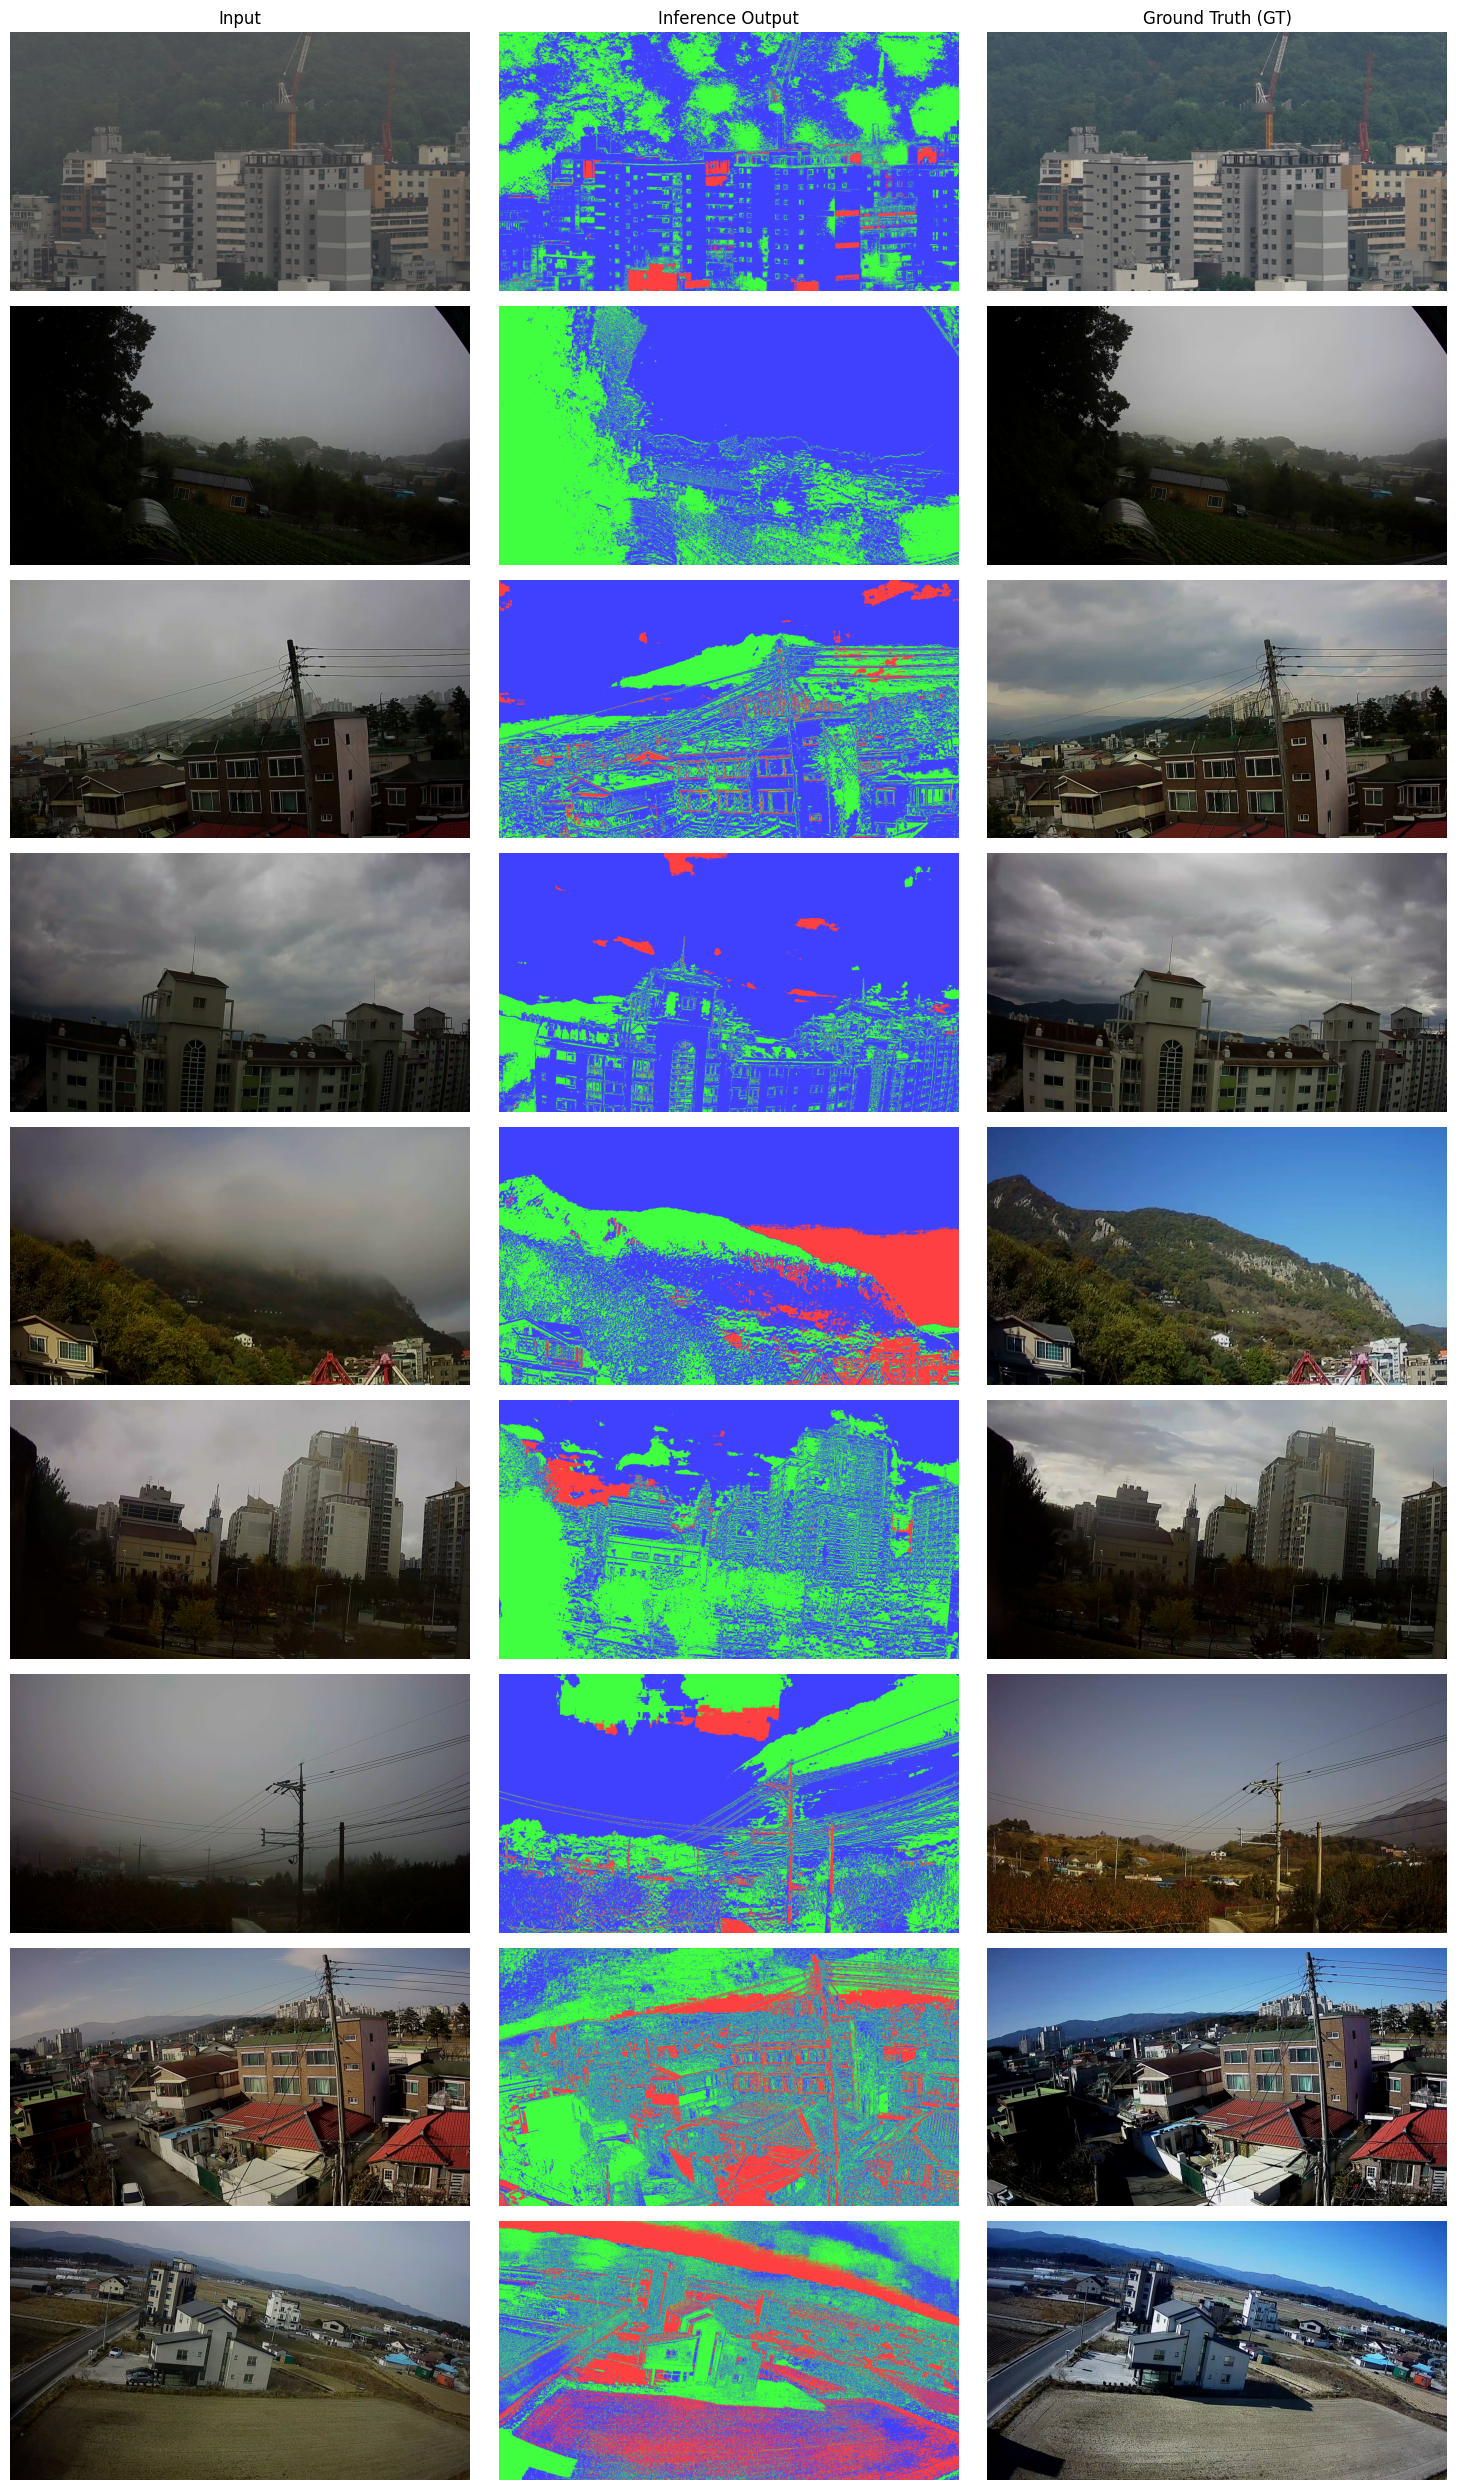

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def visualize_results(input_dir, output_dir, gt_dir):
    """
    주어진 폴더 경로에서 이미지들을 불러와 시각화합니다.

    Args:
        input_dir (str): 인풋 이미지가 있는 폴더 경로
        output_dir (str): 인퍼런스 아웃풋 이미지가 있는 폴더 경로
        gt_dir (str): GT (Ground Truth) 이미지가 있는 폴더 경로
    """

    # 각 폴더에 있는 파일 목록을 가져옵니다.
    input_files = sorted(os.listdir(input_dir))
    output_files = sorted(os.listdir(output_dir))
    gt_files = sorted(os.listdir(gt_dir))

    # 파일이 없는 경우 오류 메시지 출력
    if not input_files or not output_files or not gt_files:
        print("경로에 파일이 없습니다. 경로를 다시 확인해주세요.")
        print(f"인풋 폴더: {input_dir}, 파일 수: {len(input_files)}")
        print(f"아웃풋 폴더: {output_dir}, 파일 수: {len(output_files)}")
        print(f"GT 폴더: {gt_dir}, 파일 수: {len(gt_files)}")
        return

    # 인풋 파일명을 기준으로 시각화 순서를 정합니다.
    # 인풋/아웃풋/GT 파일명이 다르지만, 왼쪽 15자까지 같다는 전제하에 작동합니다.
    image_prefixes = [f[:15] for f in input_files]

    # 시각화할 이미지들을 저장할 딕셔너리
    images_to_show = {
        'input': [],
        'output': [],
        'gt': []
    }

    for prefix in image_prefixes:
        # 각 폴더에서 prefix가 일치하는 파일을 찾습니다.
        input_path = next((os.path.join(input_dir, f) for f in input_files if f.startswith(prefix)), None)
        output_path = next((os.path.join(output_dir, f) for f in output_files if f.startswith(prefix)), None)
        gt_path = next((os.path.join(gt_dir, f) for f in gt_files if f.startswith(prefix)), None)

        if input_path and output_path and gt_path:
            images_to_show['input'].append((input_path, prefix))
            images_to_show['output'].append((output_path, prefix))
            images_to_show['gt'].append((gt_path, prefix))
        else:
            print(f"경로에서 접두사 '{prefix}'에 해당하는 파일을 찾을 수 없습니다. 시각화를 건너뜁니다.")

    # 9x3 그리드 형태의 플롯 생성
    fig, axes = plt.subplots(nrows=len(images_to_show['input']), ncols=3, figsize=(15, 25))

    # 서브플롯 제목 설정
    column_titles = ['Input', 'Inference Output', 'Ground Truth (GT)']

    for i, prefix in enumerate(image_prefixes):
        # i번째 인풋, 아웃풋, GT 이미지 경로를 가져옵니다.
        input_path = images_to_show['input'][i][0]
        output_path = images_to_show['output'][i][0]
        gt_path = images_to_show['gt'][i][0]

        # 인풋 이미지
        try:
            img = mpimg.imread(input_path)
            axes[i, 0].imshow(img)
            axes[i, 0].set_ylabel(prefix, fontsize=8, rotation=0, ha='right')
            axes[i, 0].axis('off')
        except Exception as e:
            print(f"'{input_path}' 파일을 읽는 중 오류가 발생했습니다: {e}")
            axes[i, 0].set_title(f"Error loading Input")
            axes[i, 0].axis('off')

        # 아웃풋 이미지
        try:
            img = mpimg.imread(output_path)
            axes[i, 1].imshow(img)
            axes[i, 1].axis('off')
        except Exception as e:
            print(f"'{output_path}' 파일을 읽는 중 오류가 발생했습니다: {e}")
            axes[i, 1].set_title(f"Error loading Output")
            axes[i, 1].axis('off')

        # GT 이미지
        try:
            img = mpimg.imread(gt_path)
            axes[i, 2].imshow(img)
            axes[i, 2].axis('off')
        except Exception as e:
            print(f"'{gt_path}' 파일을 읽는 중 오류가 발생했습니다: {e}")
            axes[i, 2].set_title(f"Error loading GT")
            axes[i, 2].axis('off')

    # 맨 위의 제목 설정
    for j, title in enumerate(column_titles):
        axes[0, j].set_title(title)

    plt.tight_layout()
    plt.show()

# 함수 사용 예시
input_folder = "/content/drive/MyDrive/BOAZminiproject1/fulldata/Ensemble/input"
output_folder = "/content/drive/MyDrive/BOAZminiproject1/fulldata/Ensemble/vote_result/mask"
gt_folder = "/content/drive/MyDrive/BOAZminiproject1/fulldata/Ensemble/GT"

visualize_results(input_folder, output_folder, gt_folder)